# Data exploration

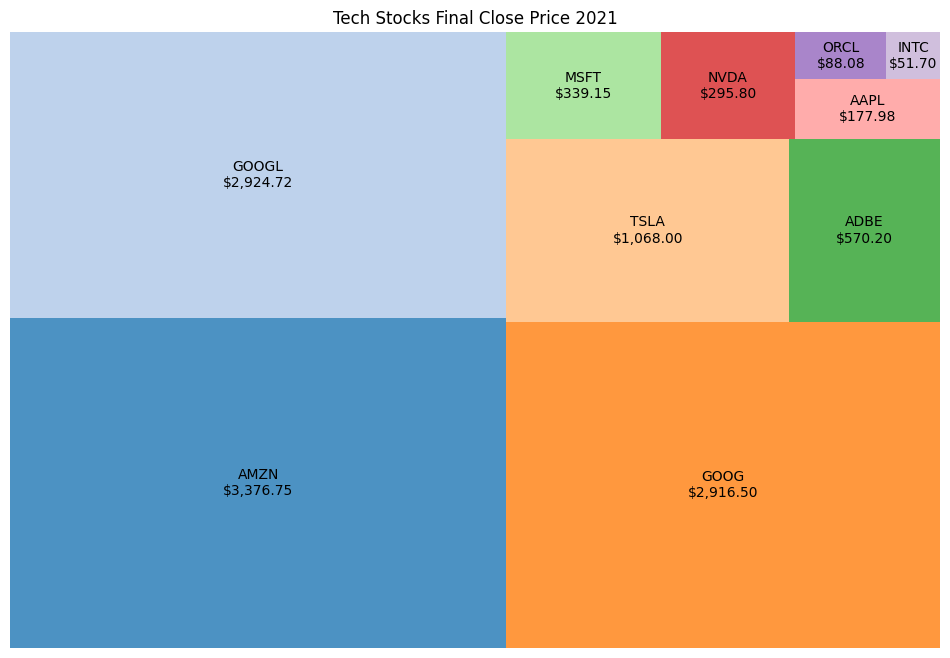

In [2]:
import os
import pandas as pd
import squarify
import matplotlib.pyplot as plt

tech_symbols = ['AAPL', 'MSFT', 'GOOGL', 'GOOG', 'AMZN', 'NVDA', 'INTC', 'TSLA', 'ORCL', 'ADBE']

data_folder = 'data'
csv_files = [f for f in os.listdir(data_folder) if f.split('.')[0] in tech_symbols]

final_close_prices = {}

for file in csv_files:
    stock_name = file.split('.')[0]  
    df = pd.read_csv(os.path.join(data_folder, file))
    if 'close' in df.columns: 
        final_close_prices[stock_name] = df['close'].iloc[-1] 

sorted_stocks = sorted(final_close_prices.items(), key=lambda x: x[1], reverse=True)
stock_names = [f"{stock[0]}\n${stock[1]:,.2f}" for stock in sorted_stocks]
stock_values = [stock[1] for stock in sorted_stocks]

plt.figure(figsize=(12, 8))
squarify.plot(
    sizes=stock_values,
    label=stock_names,
    alpha=0.8,
    color=plt.cm.tab20(range(len(stock_names))),
    text_kwargs={'fontsize':10}
)
plt.title('Tech Stocks Final Close Price 2021')
plt.axis('off')
plt.show()


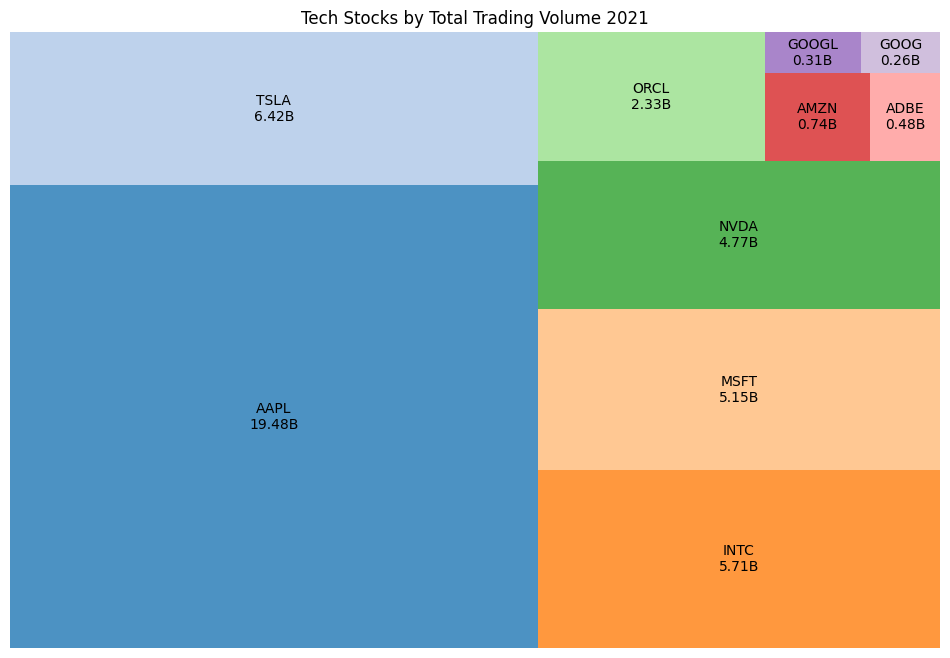

In [3]:
import os
import pandas as pd
import squarify
import matplotlib.pyplot as plt

tech_symbols = ['AAPL', 'MSFT', 'GOOGL', 'GOOG', 'AMZN', 'NVDA', 'INTC', 'TSLA', 'ORCL', 'ADBE']

data_folder = 'data'
csv_files = [f for f in os.listdir(data_folder) if f.split('.')[0] in tech_symbols]

total_volumes = {}

for file in csv_files:
    stock_name = file.split('.')[0]  
    df = pd.read_csv(os.path.join(data_folder, file))
    if 'volume' in df.columns:  
        total_volumes[stock_name] = df['volume'].sum()  

sorted_stocks = sorted(total_volumes.items(), key=lambda x: x[1], reverse=True)
stock_names = [stock[0] for stock in sorted_stocks]
stock_volumes = [stock[1] for stock in sorted_stocks]

plt.figure(figsize=(12, 8))
squarify.plot(
    sizes=stock_volumes,
    label=[f"{name}\n{volume / 1_000_000_000:.2f}B" for name, volume in zip(stock_names, stock_volumes)],  # Simplify numbers to billions
    alpha=0.8,
    color=plt.cm.tab20(range(len(stock_names)))
)
plt.title('Tech Stocks by Total Trading Volume 2021')
plt.axis('off')
plt.show()

# 1. Linear regression

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

tickers = ['AAPL', 'AMZN', 'MSFT', 'GOOGL']

dataframes = {ticker: pd.read_csv(f'data/{ticker}.csv') for ticker in tickers}

aapl_df = dataframes['AAPL']
amzn_df = dataframes['AMZN']
msft_df = dataframes['MSFT']
googl_df = dataframes['GOOGL']

print(aapl_df.head())

  ticker                       name                       date    open  \
0   AAPL  Apple Inc. - Common Stock  2021-01-04 04:00:00-05:00  133.31   
1   AAPL  Apple Inc. - Common Stock  2021-01-04 05:00:00-05:00  133.98   
2   AAPL  Apple Inc. - Common Stock  2021-01-04 06:00:00-05:00  133.68   
3   AAPL  Apple Inc. - Common Stock  2021-01-04 07:00:00-05:00  134.20   
4   AAPL  Apple Inc. - Common Stock  2021-01-04 08:00:00-05:00  133.75   

     high     low   close  adjusted close  volume  
0  134.00  133.02  133.74          133.74       0  
1  134.01  133.50  133.60          133.60       0  
2  134.43  133.43  134.22          134.22       0  
3  134.35  133.60  133.75          133.75       0  
4  134.10  133.53  134.02          134.02       0  


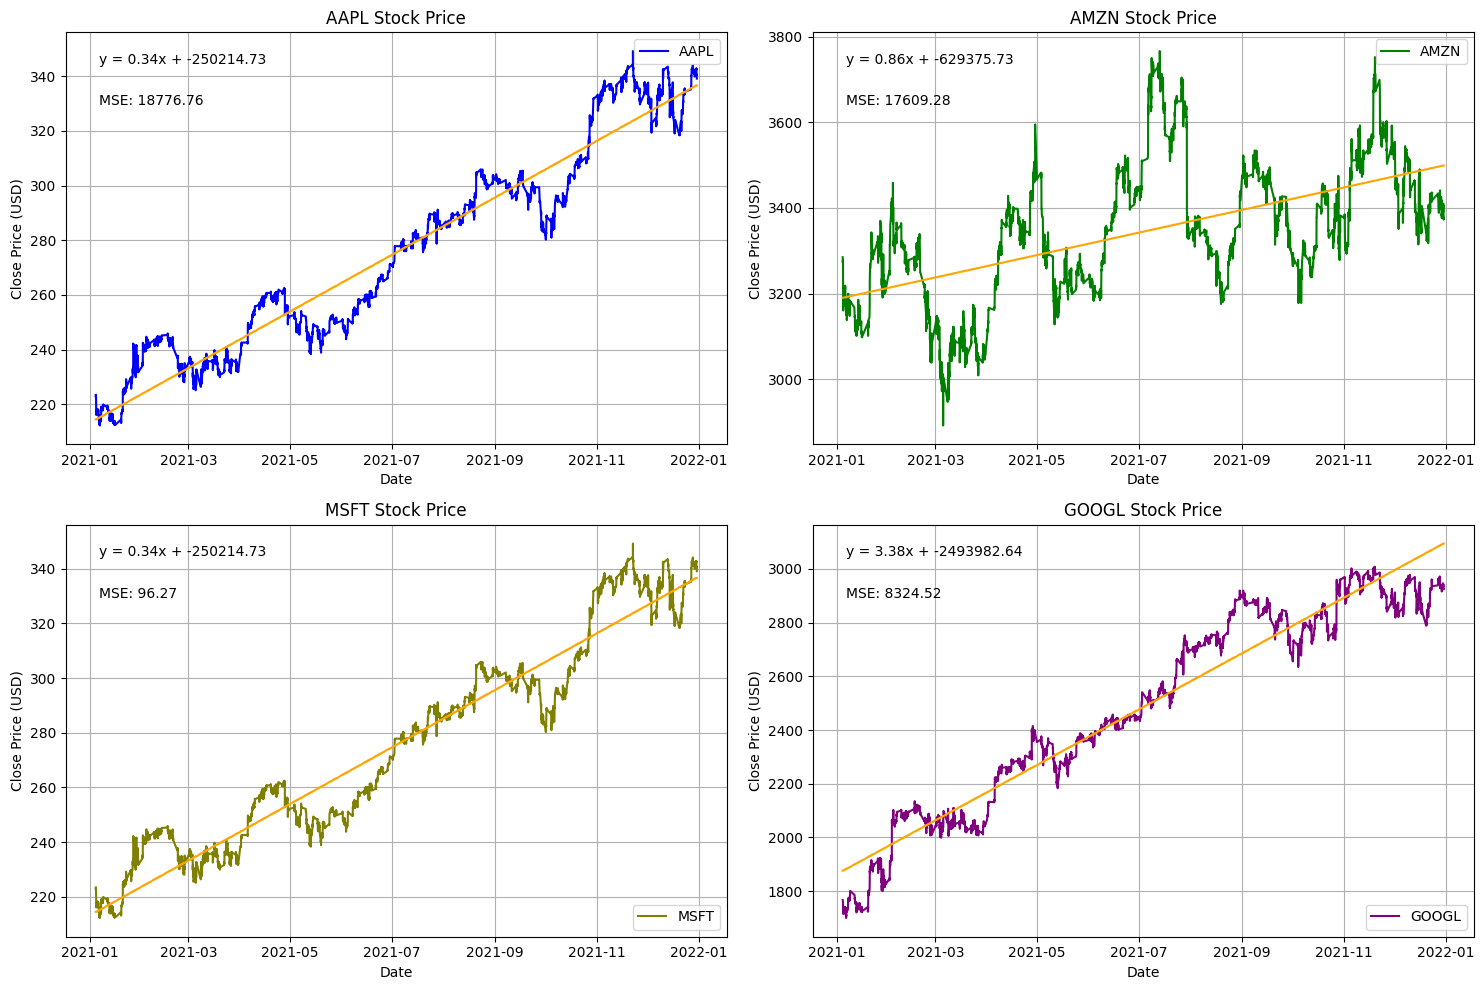

In [5]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

aapl_df['date'] = pd.to_datetime(aapl_df['date'], utc = True)
amzn_df['date'] = pd.to_datetime(amzn_df['date'], utc = True)
msft_df['date'] = pd.to_datetime(msft_df['date'], utc = True)
googl_df['date'] = pd.to_datetime(googl_df['date'], utc = True)

aapl_df['date_numeric'] = aapl_df['date'].map(pd.Timestamp.toordinal)
amzn_df['date_numeric'] = amzn_df['date'].map(pd.Timestamp.toordinal)
msft_df['date_numeric'] = msft_df['date'].map(pd.Timestamp.toordinal)
googl_df['date_numeric'] = googl_df['date'].map(pd.Timestamp.toordinal)

aapl_fit = np.polyfit(msft_df['date_numeric'], msft_df['close'], 1)
amzn_fit = np.polyfit(amzn_df['date_numeric'], amzn_df['close'], 1)
msft_fit = np.polyfit(msft_df['date_numeric'], msft_df['close'], 1)
googl_fit = np.polyfit(googl_df['date_numeric'], googl_df['close'], 1)

aapl_mse = mean_squared_error(aapl_df['close'], np.polyval(aapl_fit, msft_df['date_numeric']))
amzn_mse = mean_squared_error(amzn_df['close'], np.polyval(amzn_fit, amzn_df['date_numeric']))
msft_mse = mean_squared_error(msft_df['close'], np.polyval(msft_fit, msft_df['date_numeric']))
googl_mse = mean_squared_error(googl_df['close'], np.polyval(googl_fit, googl_df['date_numeric']))

aapl_mae = mean_absolute_error(aapl_df['close'], np.polyval(aapl_fit, msft_df['date_numeric']))
amzn_mae = mean_absolute_error(amzn_df['close'], np.polyval(amzn_fit, amzn_df['date_numeric']))
msft_mae = mean_absolute_error(msft_df['close'], np.polyval(msft_fit, msft_df['date_numeric']))
googl_mae = mean_absolute_error(googl_df['close'], np.polyval(googl_fit, googl_df['date_numeric']))

fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# AAPL
axs[0, 0].plot(msft_df['date'], msft_df['close'], label='AAPL', color='blue')
axs[0, 0].plot(msft_df['date'], np.polyval(aapl_fit, msft_df['date_numeric']), color='orange')
axs[0, 0].text(0.05, 0.95, f"y = {aapl_fit[0]:.2f}x + {aapl_fit[1]:.2f}", transform=axs[0, 0].transAxes, fontsize=10, verticalalignment='top')
axs[0, 0].text(0.05, 0.85, f"MSE: {aapl_mse:.2f}", transform=axs[0, 0].transAxes, fontsize=10, verticalalignment='top')
# axs[0, 0].text(0.05, 0.75, f"MAE: {aapl_mae:.2f}", transform=axs[0, 0].transAxes, fontsize=10, verticalalignment='top')
axs[0, 0].set_title('AAPL Stock Price')
axs[0, 0].set_xlabel('Date')
axs[0, 0].set_ylabel('Close Price (USD)')
axs[0, 0].legend()
axs[0, 0].grid(True)

# AMZN
axs[0, 1].plot(amzn_df['date'], amzn_df['close'], label='AMZN', color='green')
axs[0, 1].plot(amzn_df['date'], np.polyval(amzn_fit, amzn_df['date_numeric']), color='orange')
axs[0, 1].text(0.05, 0.95, f"y = {amzn_fit[0]:.2f}x + {amzn_fit[1]:.2f}", transform=axs[0, 1].transAxes, fontsize=10, verticalalignment='top')
axs[0, 1].text(0.05, 0.85, f"MSE: {amzn_mse:.2f}", transform=axs[0, 1].transAxes, fontsize=10, verticalalignment='top')
# axs[0, 1].text(0.05, 0.75, f"MAE: {amzn_mae:.2f}", transform=axs[0, 1].transAxes, fontsize=10, verticalalignment='top')
axs[0, 1].set_title('AMZN Stock Price')
axs[0, 1].set_xlabel('Date')
axs[0, 1].set_ylabel('Close Price (USD)')
axs[0, 1].legend()
axs[0, 1].grid(True)

# MSFT
axs[1, 0].plot(msft_df['date'], msft_df['close'], label='MSFT', color='olive')
axs[1, 0].plot(msft_df['date'], np.polyval(msft_fit, msft_df['date_numeric']), color='orange')
axs[1, 0].text(0.05, 0.95, f"y = {msft_fit[0]:.2f}x + {msft_fit[1]:.2f}", transform=axs[1, 0].transAxes, fontsize=10, verticalalignment='top')
axs[1, 0].text(0.05, 0.85, f"MSE: {msft_mse:.2f}", transform=axs[1, 0].transAxes, fontsize=10, verticalalignment='top')
# axs[1, 0].text(0.05, 0.75, f"MAE: {msft_mae:.2f}", transform=axs[1, 0].transAxes, fontsize=10, verticalalignment='top')
axs[1, 0].set_title('MSFT Stock Price')
axs[1, 0].set_xlabel('Date')
axs[1, 0].set_ylabel('Close Price (USD)')
axs[1, 0].legend()
axs[1, 0].grid(True)

# GOOGL
axs[1, 1].plot(googl_df['date'], googl_df['close'], label='GOOGL', color='purple')
axs[1, 1].plot(googl_df['date'], np.polyval(googl_fit, googl_df['date_numeric']), color='orange')
axs[1, 1].text(0.05, 0.95, f"y = {googl_fit[0]:.2f}x + {googl_fit[1]:.2f}", transform=axs[1, 1].transAxes, fontsize=10, verticalalignment='top')
axs[1, 1].text(0.05, 0.85, f"MSE: {googl_mse:.2f}", transform=axs[1, 1].transAxes, fontsize=10, verticalalignment='top')
# axs[1, 1].text(0.05, 0.75, f"MAE: {googl_mae:.2f}", transform=axs[1, 1].transAxes, fontsize=10, verticalalignment='top')
axs[1, 1].set_title('GOOGL Stock Price')
axs[1, 1].set_xlabel('Date')
axs[1, 1].set_ylabel('Close Price (USD)')
axs[1, 1].legend()
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()

# 2. Random Forest

In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

def preprocess_data(df):
    df['lag_1'] = df['close'].shift(1)
    df['lag_2'] = df['close'].shift(2)
    df['moving_avg_5'] = df['close'].rolling(window=5).mean()
    df['moving_avg_10'] = df['close'].rolling(window=10).mean()
    df['percent_change'] = df['close'].pct_change()
    df['target'] = df['close'].shift(-1)
    df = df.dropna()

    return df

aapl_df = preprocess_data(aapl_df)

features = ['lag_1', 'lag_2', 'moving_avg_5', 'moving_avg_10', 'percent_change']
X = aapl_df[features]
y = aapl_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, shuffle=False)

param_grid = {
    'n_estimators': [100, 200, 300], 
    'max_depth': [3, 5, 7, None],    
}

rf = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", -grid_search.best_score_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] END ......................max_depth=3, n_estimators=100; total time=   0.3s
[CV] END ......................max_depth=3, n_estimators=100; total time=   0.3s
[CV] END ......................max_depth=3, n_estimators=100; total time=   0.2s
[CV] END ......................max_depth=3, n_estimators=200; total time=   0.5s
[CV] END ......................max_depth=3, n_estimators=200; total time=   0.5s
[CV] END ......................max_depth=3, n_estimators=200; total time=   0.5s
[CV] END ......................max_depth=3, n_estimators=300; total time=   0.7s
[CV] END ......................max_depth=3, n_estimators=300; total time=   0.7s
[CV] END ......................max_depth=3, n_estimators=300; total time=   0.7s
[CV] END ......................max_depth=5, n_estimators=100; total time=   0.3s
[CV] END ......................max_depth=5, n_estimators=100; total time=   0.3s
[CV] END ......................max_depth=5, n_es

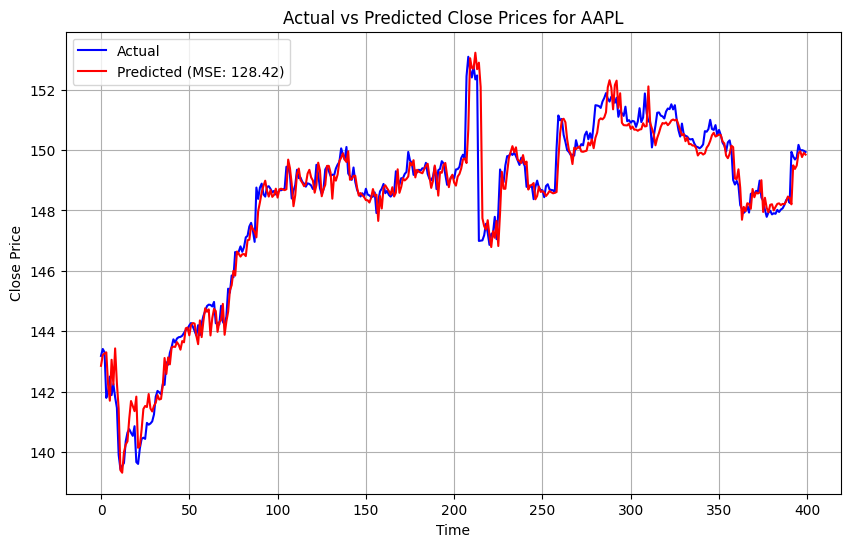

In [ ]:
model = RandomForestRegressor(
    n_estimators=100, 
    random_state=42
)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

start, end = 0, 400

y_test_range = y_test.iloc[start:end]
y_pred_range = y_pred[start:end]

plt.figure(figsize=(10, 6))
plt.plot(y_test_range.values, label='Actual', color='blue')
plt.plot(y_pred_range, label=f'Predicted (MSE: {mse:.2f})', color='red')
plt.legend()
plt.title('Actual vs Predicted Close Prices for AAPL')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

In [ ]:
amzn_df = preprocess_data(amzn_df)

features = ['lag_1', 'lag_2', 'moving_avg_5', 'moving_avg_10', 'percent_change']
X = amzn_df[features]
y = amzn_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

param_grid = {
    'n_estimators': [100, 200, 300], 
    'max_depth': [3, 5, 7, None],    
}

rf = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", -grid_search.best_score_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] END ......................max_depth=3, n_estimators=100; total time=   0.3s
[CV] END ......................max_depth=3, n_estimators=100; total time=   0.3s
[CV] END ......................max_depth=3, n_estimators=100; total time=   0.3s
[CV] END ......................max_depth=3, n_estimators=200; total time=   0.5s
[CV] END ......................max_depth=3, n_estimators=200; total time=   0.5s
[CV] END ......................max_depth=3, n_estimators=200; total time=   0.5s
[CV] END ......................max_depth=3, n_estimators=300; total time=   0.8s
[CV] END ......................max_depth=3, n_estimators=300; total time=   0.7s
[CV] END ......................max_depth=3, n_estimators=300; total time=   0.8s
[CV] END ......................max_depth=5, n_estimators=100; total time=   0.4s
[CV] END ......................max_depth=5, n_estimators=100; total time=   0.3s
[CV] END ......................max_depth=5, n_es

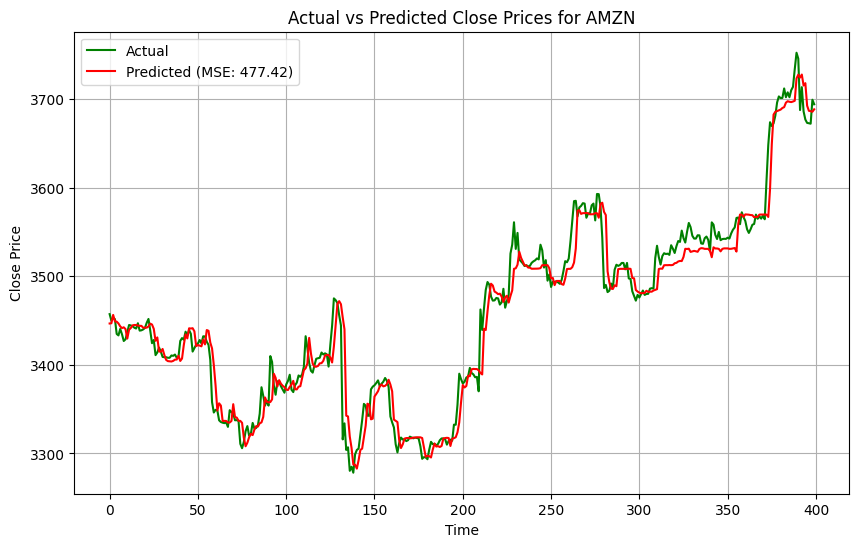

In [11]:
model = RandomForestRegressor(
    n_estimators=200, 
    random_state=42, 
    max_depth=5
)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

start, end = 0, 400

y_test_range = y_test.iloc[start:end]
y_pred_range = y_pred[start:end]

plt.figure(figsize=(10, 6))
plt.plot(y_test_range.values, label='Actual', color='green')
plt.plot(y_pred_range, label=f'Predicted (MSE: {mse:.2f})', color='red')
plt.legend()
plt.title('Actual vs Predicted Close Prices for AMZN')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

In [12]:
msft_df = preprocess_data(msft_df)

features = ['lag_1', 'lag_2', 'moving_avg_5', 'moving_avg_10', 'percent_change']
X = msft_df[features]
y = msft_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

param_grid = {
    'n_estimators': [100, 200, 300], 
    'max_depth': [3, 5, 7, None],    
}

rf = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", -grid_search.best_score_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] END ......................max_depth=3, n_estimators=100; total time=   0.3s
[CV] END ......................max_depth=3, n_estimators=100; total time=   0.3s
[CV] END ......................max_depth=3, n_estimators=100; total time=   0.3s
[CV] END ......................max_depth=3, n_estimators=200; total time=   0.5s
[CV] END ......................max_depth=3, n_estimators=200; total time=   0.6s
[CV] END ......................max_depth=3, n_estimators=200; total time=   0.5s
[CV] END ......................max_depth=3, n_estimators=300; total time=   0.8s
[CV] END ......................max_depth=3, n_estimators=300; total time=   0.8s
[CV] END ......................max_depth=3, n_estimators=300; total time=   0.8s
[CV] END ......................max_depth=5, n_estimators=100; total time=   0.4s
[CV] END ......................max_depth=5, n_estimators=100; total time=   0.4s
[CV] END ......................max_depth=5, n_es

Mean Squared Error: 4.781366921051151


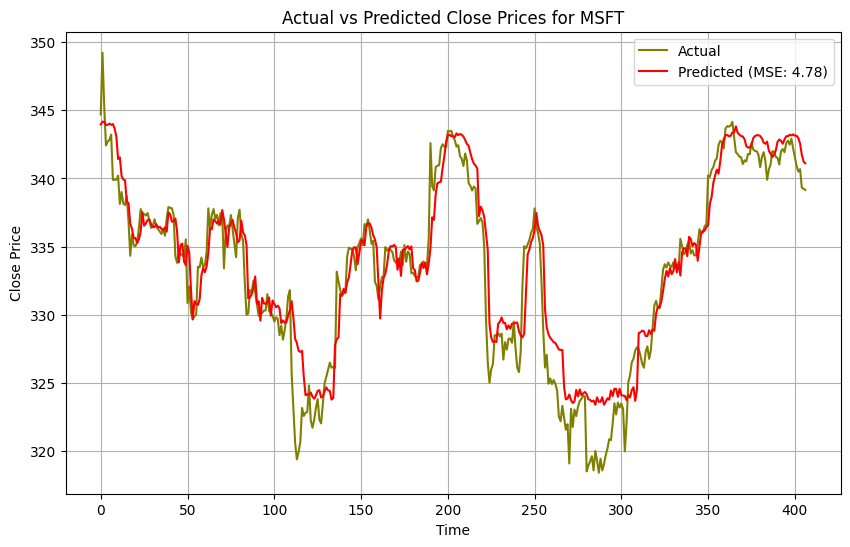

In [13]:
model = RandomForestRegressor(
    n_estimators=100, 
    random_state=42, 
    max_depth=8
)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', color='olive')
plt.plot(y_pred, label=f'Predicted (MSE: {mse:.2f})', color='red')
plt.legend()
plt.title('Actual vs Predicted Close Prices for MSFT')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

In [14]:
googl_df = preprocess_data(googl_df)

features = ['lag_1', 'lag_2', 'moving_avg_5', 'moving_avg_10', 'percent_change']
X = googl_df[features]
y = googl_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=False)

param_grid = {
    'n_estimators': [100, 200, 500], 
    'max_depth': [3, 5, 7, None],    
}

rf = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", -grid_search.best_score_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] END ......................max_depth=3, n_estimators=100; total time=   0.3s
[CV] END ......................max_depth=3, n_estimators=100; total time=   0.3s
[CV] END ......................max_depth=3, n_estimators=100; total time=   0.3s
[CV] END ......................max_depth=3, n_estimators=200; total time=   0.5s
[CV] END ......................max_depth=3, n_estimators=200; total time=   0.5s
[CV] END ......................max_depth=3, n_estimators=200; total time=   0.5s
[CV] END ......................max_depth=3, n_estimators=500; total time=   1.2s
[CV] END ......................max_depth=3, n_estimators=500; total time=   1.2s
[CV] END ......................max_depth=3, n_estimators=500; total time=   1.3s
[CV] END ......................max_depth=5, n_estimators=100; total time=   0.4s
[CV] END ......................max_depth=5, n_estimators=100; total time=   0.4s
[CV] END ......................max_depth=5, n_es

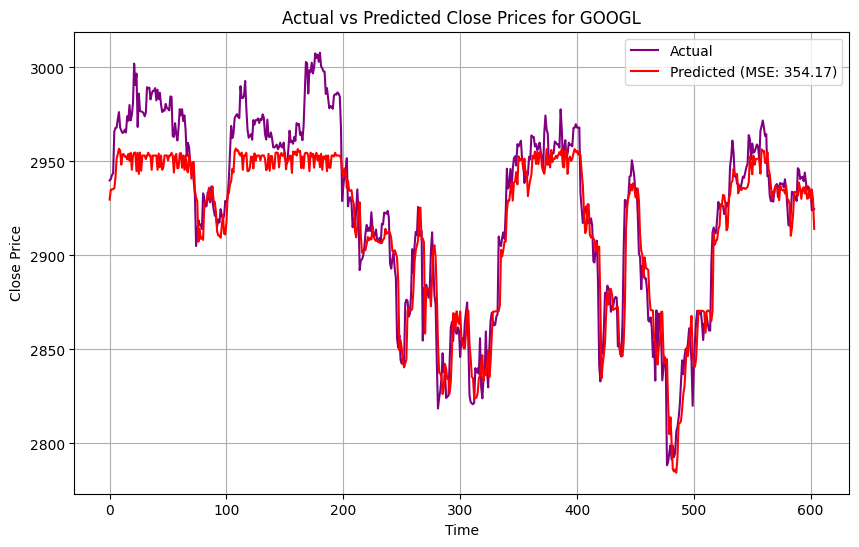

In [15]:
model = RandomForestRegressor(
    n_estimators=500, 
    random_state=42, 
    max_depth=7
)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', color='purple')
plt.plot(y_pred, label=f'Predicted (MSE: {mse:.2f})', color='red')
plt.legend()
plt.title('Actual vs Predicted Close Prices for GOOGL')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

# 3. XGBoost

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}


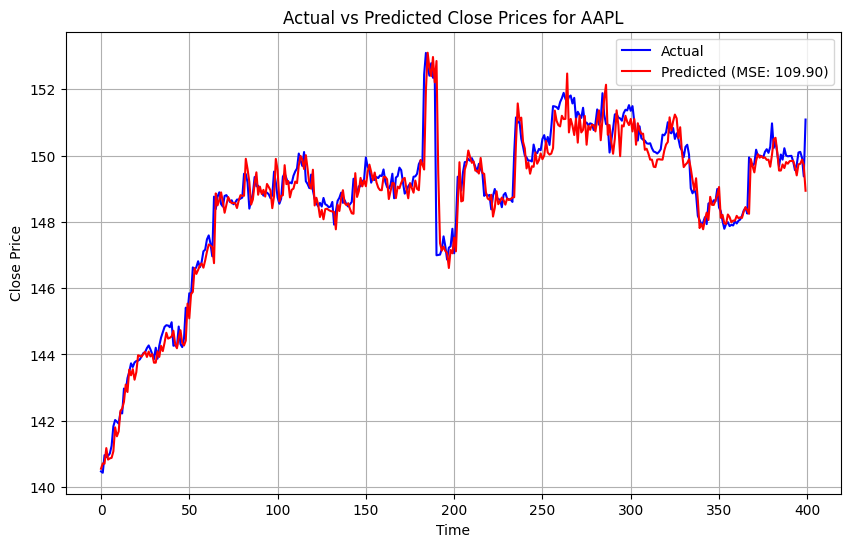

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

aapl_df = preprocess_data(aapl_df)

features = ['lag_1', 'lag_2', 'moving_avg_5', 'moving_avg_10', 'percent_change']
X = aapl_df[features]
y = aapl_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, shuffle=False)

param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1]
}
grid_search = GridSearchCV(XGBRegressor(), param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.1, 
    max_depth=3,
    random_state=42
)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

start, end = 0, 400

y_test_range = y_test.iloc[start:end]
y_pred_range = y_pred[start:end]

plt.figure(figsize=(10, 6))
plt.plot(y_test_range.values, label='Actual', color='blue')
plt.plot(y_pred_range, label=f'Predicted (MSE: {mse:.2f})', color='red')
plt.legend()
plt.title('Actual vs Predicted Close Prices for AAPL')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

In [ ]:
amzn_df = preprocess_data(amzn_df)

features = ['lag_1', 'lag_2', 'moving_avg_5', 'moving_avg_10', 'percent_change']
X = amzn_df[features]
y = amzn_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1]
}

grid_search = GridSearchCV(XGBRegressor(), param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}


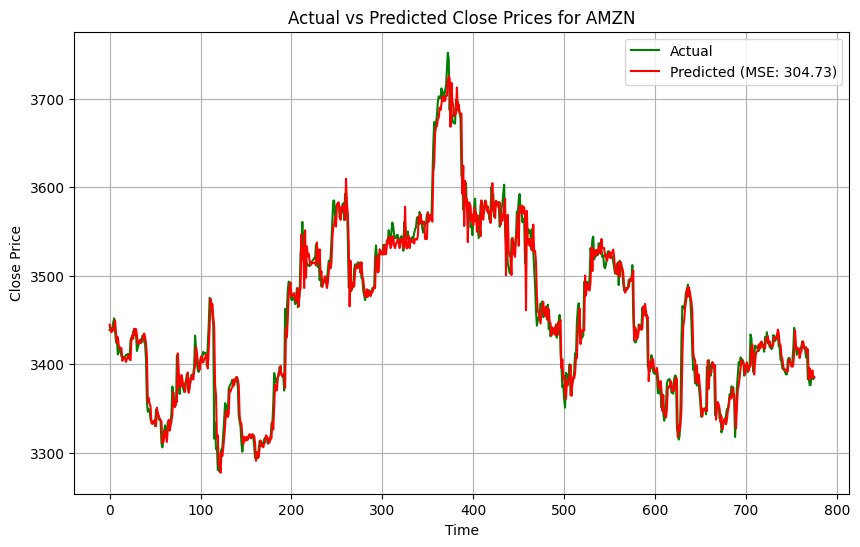

In [ ]:
model = XGBRegressor(
    n_estimators=200,
    max_depth=3,
    learning_rate=0.05, 
    random_state=42
)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

start, end = 0, 800
y_test_range = y_test.iloc[start:end]
y_pred_range = y_pred[start:end]

plt.figure(figsize=(10, 6))
plt.plot(y_test_range.values, label='Actual', color='green')
plt.plot(y_pred_range, label=f'Predicted (MSE: {mse:.2f})', color='red')
plt.legend()
plt.title('Actual vs Predicted Close Prices for AMZN')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

In [184]:
msft_df = preprocess_data(msft_df)

features = ['lag_1', 'lag_2', 'moving_avg_5', 'moving_avg_10', 'percent_change']
X = msft_df[features]
y = msft_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1]
}

grid_search = GridSearchCV(XGBRegressor(), param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}


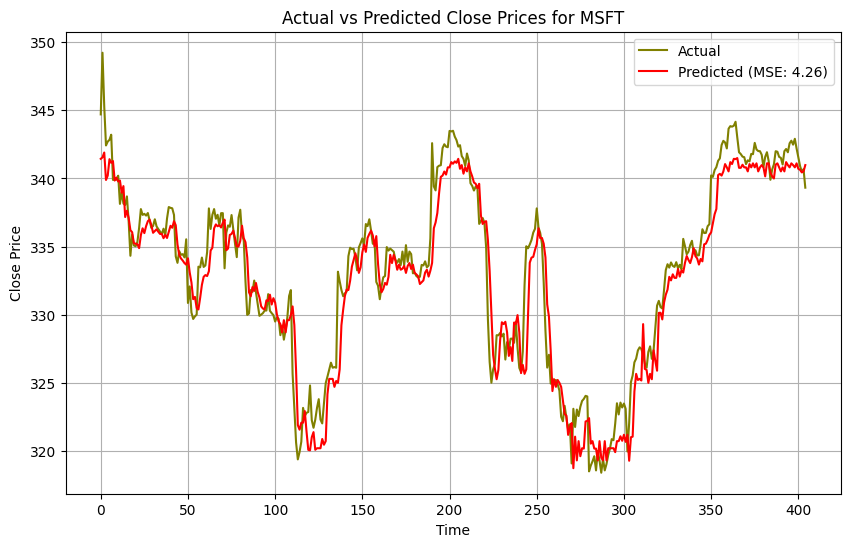

In [186]:
model = XGBRegressor(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.05,
    random_state=42
)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', color='olive')
plt.plot(y_pred, label=f'Predicted (MSE: {mse:.2f})', color='red')
plt.legend()
plt.title('Actual vs Predicted Close Prices for MSFT')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

In [187]:
googl_df = preprocess_data(googl_df)

features = ['lag_1', 'lag_2', 'moving_avg_5', 'moving_avg_10', 'percent_change']
X = googl_df[features]
y = googl_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=False)

grid_search = GridSearchCV(XGBRegressor(), param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}


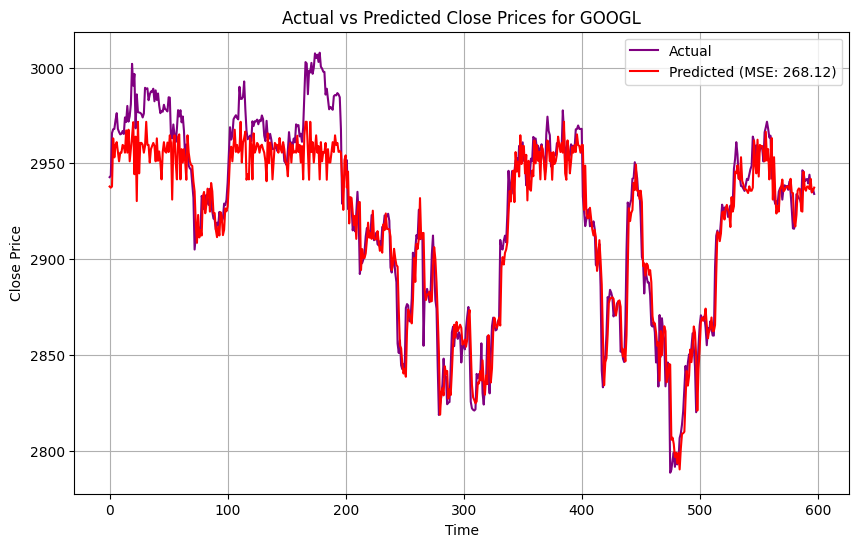

In [ ]:
model = XGBRegressor(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    random_state=42
)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', color='purple')
plt.plot(y_pred, label=f'Predicted (MSE: {mse:.2f})', color='red')
plt.legend()
plt.title('Actual vs Predicted Close Prices for GOOGL')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

# 4. LSTM

Epoch 1/15


/tmp/ipykernel_23589/1703142479.py:10: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['date'] = pd.to_datetime(df['date'])
/home/albert-ong/py312env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0118 - val_loss: 0.0011
Epoch 2/15
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 8.0360e-04 - val_loss: 8.6720e-04
Epoch 3/15
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 8.5293e-04 - val_loss: 7.1199e-04
Epoch 4/15
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 6.8747e-04 - val_loss: 5.8970e-04
Epoch 5/15
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 6.4470e-04 - val_loss: 9.1845e-04
Epoch 6/15
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5.3297e-04 - val_loss: 4.9770e-04
Epoch 7/15
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5.4076e-04 - val_loss: 4.7470e-04
Epoch 8/15
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5.0215e-04 - val_loss: 4.3807e-04
Epoch 9/15
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.7584e-04 - val_loss: 5.8975e-04
Epoch 10/15
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 4.8255e-04 - val_loss: 5.1430e-04
Epoch 11/15
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.5422e-04 - val_loss: 4.0839e-04
Epo

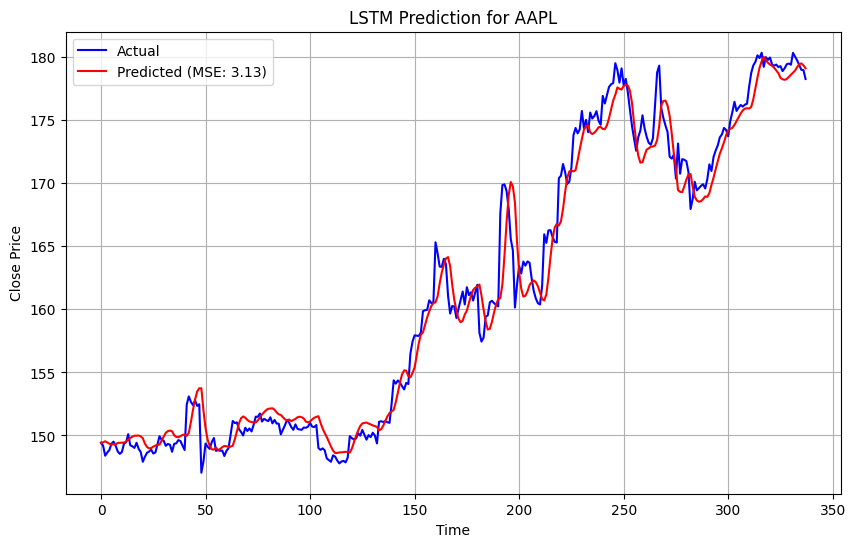

In [123]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

df = pd.read_csv('data/AAPL.csv')
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')
df = df[df['volume'] > 0] 
df = df[['close', 'volume']]

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

def create_lstm_sequences(data, window_size):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[i-window_size:i])
        y.append(data[i, 0])  
    return np.array(X), np.array(y)

window_size = 24
X_lstm, y_lstm = create_lstm_sequences(scaled_data, window_size)

split = int(len(X_lstm) * 0.8)
X_train_lstm, X_test_lstm = X_lstm[:split], X_lstm[split:]
y_train_lstm, y_test_lstm = y_lstm[:split], y_lstm[split:]

model_lstm = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    LSTM(50),
    Dense(1)
])
model_lstm.compile(optimizer='adam', loss='mse')
model_lstm.fit(X_train_lstm, y_train_lstm, epochs=15, batch_size=16, validation_split=0.1)

y_pred_lstm = model_lstm.predict(X_test_lstm)
predicted_close_lstm = scaler.inverse_transform(np.concatenate([y_pred_lstm, np.zeros((len(y_pred_lstm), 1))], axis=1))[:,0]
actual_close_lstm = scaler.inverse_transform(np.concatenate([y_test_lstm.reshape(-1,1), np.zeros((len(y_test_lstm), 1))], axis=1))[:,0]

mse = mean_squared_error(actual_close_lstm, predicted_close_lstm)

plt.figure(figsize=(10,6))
plt.plot(actual_close_lstm, label='Actual', color='blue')
plt.plot(predicted_close_lstm, label=f'Predicted (MSE: {mse:.2f})', color='red')
plt.title("LSTM Prediction for AAPL")
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

Epoch 1/10


/tmp/ipykernel_23589/1402975451.py:2: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['date'] = pd.to_datetime(df['date'])
/home/albert-ong/py312env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0515 - val_loss: 0.0024
Epoch 2/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0031 - val_loss: 0.0019
Epoch 3/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0023 - val_loss: 0.0015
Epoch 4/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0019 - val_loss: 0.0014
Epoch 5/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0018 - val_loss: 0.0013
Epoch 6/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0019 - val_loss: 0.0011
Epoch 7/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 8/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0014 - val_loss: 9.2623e-04
Epoch 9/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0013 - val_loss: 8.8623e-04
Epoch 10/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0012 - val_loss: 9.5803e-04
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


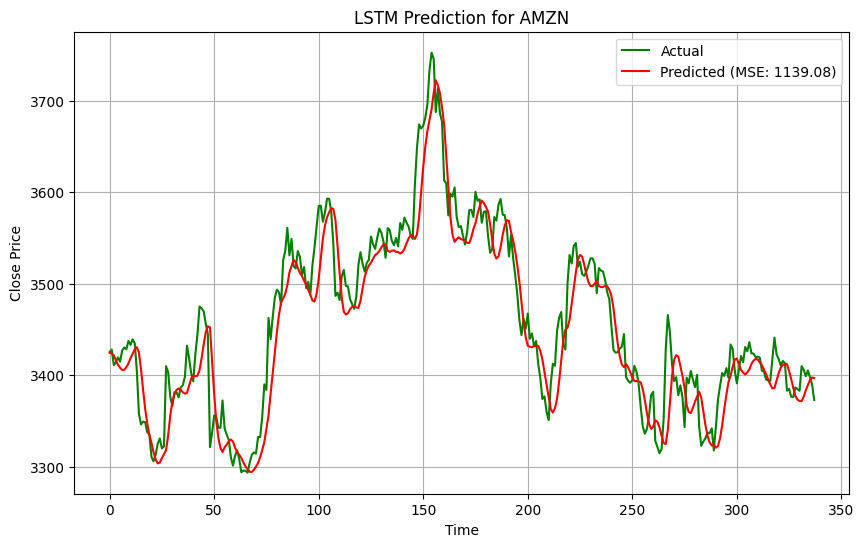

In [124]:
df = pd.read_csv('data/AMZN.csv') 
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')
df = df[df['volume'] > 0]  
df = df[['close', 'volume']]

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

def create_lstm_sequences(data, window_size):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[i-window_size:i])
        y.append(data[i, 0])  
    return np.array(X), np.array(y)

window_size = 24
X_lstm, y_lstm = create_lstm_sequences(scaled_data, window_size)

split = int(len(X_lstm) * 0.8)
X_train_lstm, X_test_lstm = X_lstm[:split], X_lstm[split:]
y_train_lstm, y_test_lstm = y_lstm[:split], y_lstm[split:]

model_lstm = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    LSTM(50),
    Dense(1)
])
model_lstm.compile(optimizer='adam', loss='mse')
model_lstm.fit(X_train_lstm, y_train_lstm, epochs=10, batch_size=16, validation_split=0.1)

y_pred_lstm = model_lstm.predict(X_test_lstm)
predicted_close_lstm = scaler.inverse_transform(np.concatenate([y_pred_lstm, np.zeros((len(y_pred_lstm), 1))], axis=1))[:,0]
actual_close_lstm = scaler.inverse_transform(np.concatenate([y_test_lstm.reshape(-1,1), np.zeros((len(y_test_lstm), 1))], axis=1))[:,0]

mse = mean_squared_error(actual_close_lstm, predicted_close_lstm)

plt.figure(figsize=(10, 6))
plt.plot(actual_close_lstm, label='Actual', color='green')
plt.plot(predicted_close_lstm, label=f'Predicted (MSE: {mse:.2f})', color='red')
plt.title("LSTM Prediction for AMZN")
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

Epoch 1/20


/tmp/ipykernel_23589/773886266.py:2: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['date'] = pd.to_datetime(df['date'])
/home/albert-ong/py312env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0149 - val_loss: 7.4756e-04
Epoch 2/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 4.3796e-04 - val_loss: 8.0032e-04
Epoch 3/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3.9377e-04 - val_loss: 6.2609e-04
Epoch 4/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.1539e-04 - val_loss: 6.2048e-04
Epoch 5/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.3310e-04 - val_loss: 6.2457e-04
Epoch 6/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3.5777e-04 - val_loss: 4.9550e-04
Epoch 7/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3.1445e-04 - val_loss: 5.1226e-04
Epoch 8/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 3.1693e-04 - val_loss: 7.4973e-04
Epoch 9/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.9472e-04 - val_loss: 4.6463e-04
Epoch 10/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.2812e-04 - val_loss: 5.5252e-04
Epoch 11/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3.6018e-04 - val_loss: 3

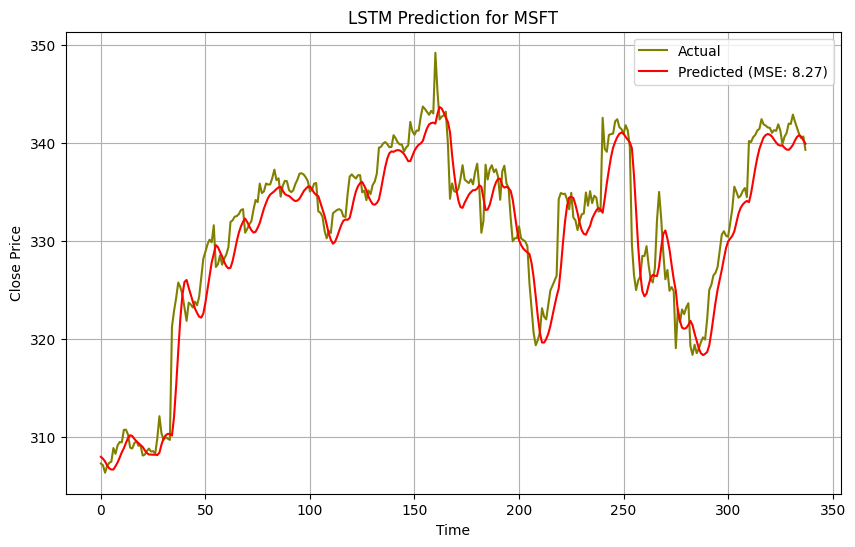

In [125]:
df = pd.read_csv('data/MSFT.csv') 
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')
df = df[df['volume'] > 0]  
df = df[['close', 'volume']]

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

def create_lstm_sequences(data, window_size):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[i-window_size:i])
        y.append(data[i, 0])  
    return np.array(X), np.array(y)

window_size = 24
X_lstm, y_lstm = create_lstm_sequences(scaled_data, window_size)

split = int(len(X_lstm) * 0.8)
X_train_lstm, X_test_lstm = X_lstm[:split], X_lstm[split:]
y_train_lstm, y_test_lstm = y_lstm[:split], y_lstm[split:]

model_lstm = Sequential([
    LSTM(100, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    LSTM(50),
    Dense(1)
])
model_lstm.compile(optimizer='adam', loss='mse')
model_lstm.fit(X_train_lstm, y_train_lstm, epochs=20, batch_size=16, validation_split=0.1)

y_pred_lstm = model_lstm.predict(X_test_lstm)
predicted_close_lstm = scaler.inverse_transform(np.concatenate([y_pred_lstm, np.zeros((len(y_pred_lstm), 1))], axis=1))[:,0]
actual_close_lstm = scaler.inverse_transform(np.concatenate([y_test_lstm.reshape(-1,1), np.zeros((len(y_test_lstm), 1))], axis=1))[:,0]

mse = mean_squared_error(actual_close_lstm, predicted_close_lstm)

plt.figure(figsize=(10, 6))
plt.plot(actual_close_lstm, label='Actual', color='olive')
plt.plot(predicted_close_lstm, label=f'Predicted (MSE: {mse:.2f})', color='red')
plt.title("LSTM Prediction for MSFT")
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

Epoch 1/20


/tmp/ipykernel_23589/3907709334.py:2: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['date'] = pd.to_datetime(df['date'])
/home/albert-ong/py312env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0286 - val_loss: 0.0010
Epoch 2/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 6.3711e-04 - val_loss: 9.4745e-04
Epoch 3/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 5.7217e-04 - val_loss: 9.6491e-04
Epoch 4/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 5.7026e-04 - val_loss: 9.1541e-04
Epoch 5/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 4.6862e-04 - val_loss: 8.8986e-04
Epoch 6/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 5.5561e-04 - val_loss: 8.6925e-04
Epoch 7/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 5.0152e-04 - val_loss: 8.6237e-04
Epoch 8/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.5999e-04 - val_loss: 8.3771e-04
Epoch 9/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 4.2925e-04 - val_loss: 7.9763e-04
Epoch 10/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.6370e-04 - val_loss: 9.6473e-04
Epoch 11/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.2047e-04 - val_loss: 7.417

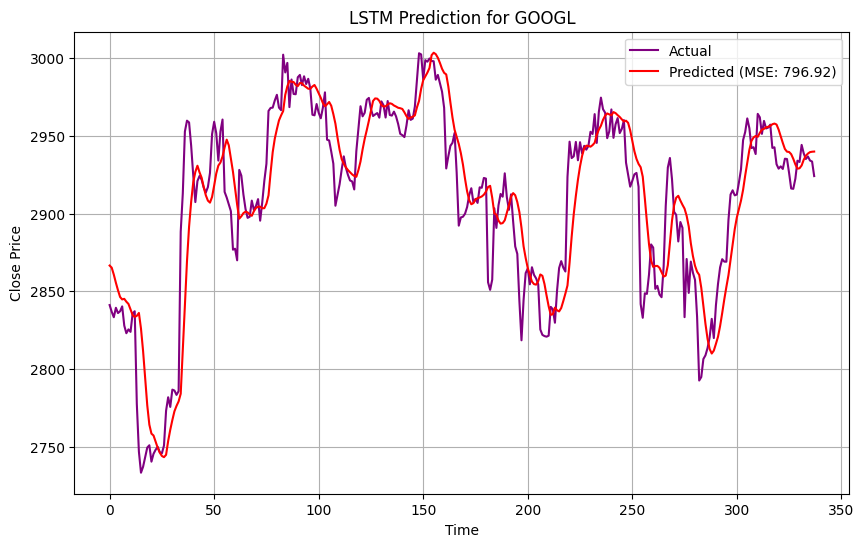

In [176]:
df = pd.read_csv('data/GOOGL.csv') 
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')
df = df[df['volume'] > 0]  
df = df[['close', 'volume']]

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

def create_lstm_sequences(data, window_size):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[i-window_size:i])
        y.append(data[i, 0])  
    return np.array(X), np.array(y)

window_size = 24
X_lstm, y_lstm = create_lstm_sequences(scaled_data, window_size)

split = int(len(X_lstm) * 0.8)
X_train_lstm, X_test_lstm = X_lstm[:split], X_lstm[split:]
y_train_lstm, y_test_lstm = y_lstm[:split], y_lstm[split:]

model_lstm = Sequential([
    LSTM(100, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    LSTM(50),
    Dense(1)
])
model_lstm.compile(optimizer='adam', loss='mse')
model_lstm.fit(X_train_lstm, y_train_lstm, epochs=20, batch_size=16, validation_split=0.1)

y_pred_lstm = model_lstm.predict(X_test_lstm)
predicted_close_lstm = scaler.inverse_transform(np.concatenate([y_pred_lstm, np.zeros((len(y_pred_lstm), 1))], axis=1))[:,0]
actual_close_lstm = scaler.inverse_transform(np.concatenate([y_test_lstm.reshape(-1,1), np.zeros((len(y_test_lstm), 1))], axis=1))[:,0]

mse = mean_squared_error(actual_close_lstm, predicted_close_lstm)

plt.figure(figsize=(10, 6))
plt.plot(actual_close_lstm, label='Actual', color='purple')
plt.plot(predicted_close_lstm, label=f'Predicted (MSE: {mse:.2f})', color='red')
plt.title("LSTM Prediction for GOOGL")
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()